<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/DPHI_Data_Sprint_50_Credit_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

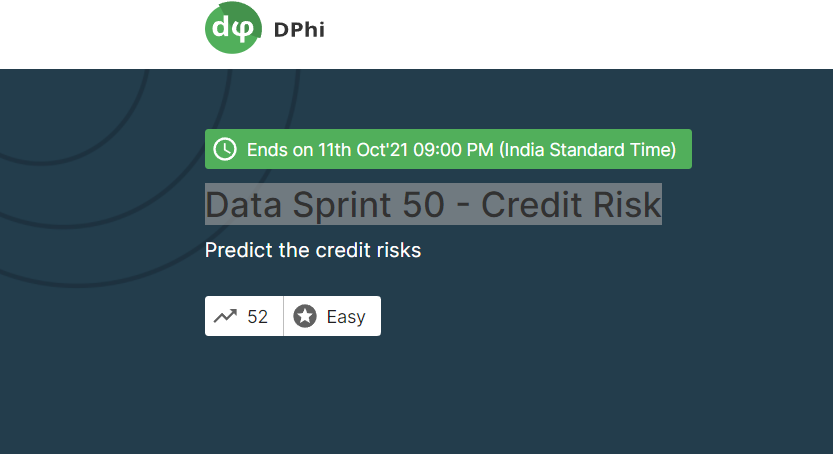

## Problem statement : Predict whether a credit given to an individual is a good or a bad risk.

* The dataset classifies people described by a set of attributes as good or bad credit risks. 
* It includes data ranging from credit history, purpose, count of dependents, and others that gives you a fair idea of the person seeking credit. 
* We will have to build a machine learning model to predict whether a credit **(target variable is 'class')** given to an individual is a good or a bad risk.

## Evaluation Metrics

**F1 Score * 100**

## Data Description:

Below are the variables and their corresponding description for the credit risk dataset. 

* The **target variable is class** that predicts whether an instance of credit is bad or good

#### Column name	Description

* checking_status	--> Status of existing checking account, in Deutsche Mark
* duration --> 	Duration in months
* credit_history --> 	Credit history (credits taken, paid back duly, delays, critical accounts)
* purpose --> 	Purpose of the credit (car, television,...)
credit_amount	Credit amount
* savings_status --> 	Status of savings account/bonds, in Deutsche Mark
* employment --> 	Present employment, in number of years
* installment_commitment -->	Installment rate in percentage of disposable income
* personal_status	--> Personal status (married, single,...) and sex
* other_parties -->	Other debtors / guarantors
* residence_since	--> Present residence since X years
* property_magnitude -->	Property (e.g. real estate)
age	Age in years
* other_payment_plans	--> Other installment plans (banks, stores)
* housing	 --> Housing (rent, own,...)
* existing_credits -->	Number of existing credits at this bank
job	Job
* num_dependents -->	Number of people being liable to provide maintenance for
* own_telephone -->	Telephone (yes,no)
* foreign_worker --> 	Foreign worker (yes,no)
* **class** 	Target variable (1, 0) - **1 = good, 0 = bad**

##  Saving Prediction File & Sample Submission

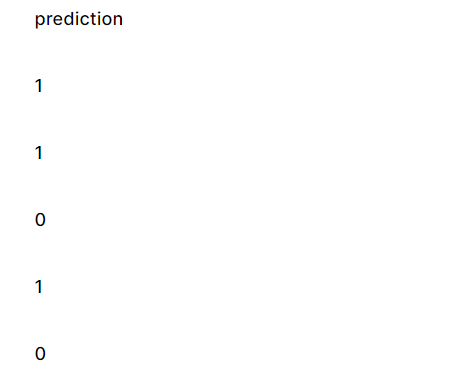

In [1]:
from google.colab import files
files.upload()

Saving test_data.csv to test_data.csv
Saving train_dataset.csv to train_dataset.csv


{'test_data.csv': b"checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker\n'no checking',18,'existing paid','new car',2662,'no known savings','4<=X<7',4,'male single',none,3,'life insurance',32,none,own,1,skilled,1,none,no\n'no checking',18,'existing paid',radio/tv,1505,'<100','1<=X<4',4,'male single',none,2,'no known property',32,none,'for free',1,'high qualif/self emp/mgmt',1,yes,yes\n'no checking',12,'delayed previously',repairs,1555,'>=1000','>=7',4,'male single',none,4,'no known property',55,none,'for free',2,skilled,2,none,yes\n'no checking',15,'existing paid','new car',3186,'>=1000','4<=X<7',2,'female div/dep/mar',none,3,car,20,none,rent,1,skilled,1,none,yes\n'<0',48,'no credits/all paid','used car',4605,'<100','>=7',3,'male single',none,4,'no known property',24,n

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv("/content/train_dataset.csv")
test = pd.read_csv("/content/test_data.csv")

In [4]:
train.head()

,Unnamed: 0,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0,'no checking',18,'critical/other existing credit',radio/tv,1800,'<100','1<=X<4',4,'male single',none,2,car,24,none,own,2,skilled,1,none,yes,1
1,1,'<0',24,'existing paid',radio/tv,2439,'<100','<1',4,'female div/dep/mar',none,4,'real estate',35,none,own,1,skilled,1,yes,yes,0
2,2,'no checking',36,'no credits/all paid',repairs,2613,'<100','1<=X<4',4,'male single',none,2,car,27,none,own,2,skilled,1,none,yes,1
3,3,'no checking',15,'existing paid',education,4623,'100<=X<500','1<=X<4',3,'male single',none,2,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,0
4,4,'<0',21,'existing paid',furniture/equipment,3599,'<100','4<=X<7',1,'female div/dep/mar',none,4,car,26,none,rent,1,'unskilled resident',1,none,yes,1


In [6]:
train.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
train.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'no checking',18,'critical/other existing credit',radio/tv,1800,'<100','1<=X<4',4,'male single',none,2,car,24,none,own,2,skilled,1,none,yes,1
1,'<0',24,'existing paid',radio/tv,2439,'<100','<1',4,'female div/dep/mar',none,4,'real estate',35,none,own,1,skilled,1,yes,yes,0
2,'no checking',36,'no credits/all paid',repairs,2613,'<100','1<=X<4',4,'male single',none,2,car,27,none,own,2,skilled,1,none,yes,1
3,'no checking',15,'existing paid',education,4623,'100<=X<500','1<=X<4',3,'male single',none,2,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,0
4,'<0',21,'existing paid',furniture/equipment,3599,'<100','4<=X<7',1,'female div/dep/mar',none,4,car,26,none,rent,1,'unskilled resident',1,none,yes,1


In [8]:
train.isnull().sum()[train.isnull().sum() > 0]

Series([], dtype: int64)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         800 non-null    object
 1   duration                800 non-null    int64 
 2   credit_history          800 non-null    object
 3   purpose                 800 non-null    object
 4   credit_amount           800 non-null    int64 
 5   savings_status          800 non-null    object
 6   employment              800 non-null    object
 7   installment_commitment  800 non-null    int64 
 8   personal_status         800 non-null    object
 9   other_parties           800 non-null    object
 10  residence_since         800 non-null    int64 
 11  property_magnitude      800 non-null    object
 12  age                     800 non-null    int64 
 13  other_payment_plans     800 non-null    object
 14  housing                 800 non-null    object
 15  existi

In [5]:
test.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',18,'existing paid','new car',2662,'no known savings','4<=X<7',4,'male single',none,3,'life insurance',32,none,own,1,skilled,1,none,no
1,'no checking',18,'existing paid',radio/tv,1505,'<100','1<=X<4',4,'male single',none,2,'no known property',32,none,'for free',1,'high qualif/self emp/mgmt',1,yes,yes
2,'no checking',12,'delayed previously',repairs,1555,'>=1000','>=7',4,'male single',none,4,'no known property',55,none,'for free',2,skilled,2,none,yes
3,'no checking',15,'existing paid','new car',3186,'>=1000','4<=X<7',2,'female div/dep/mar',none,3,car,20,none,rent,1,skilled,1,none,yes
4,'<0',48,'no credits/all paid','used car',4605,'<100','>=7',3,'male single',none,4,'no known property',24,none,'for free',2,skilled,2,none,yes


In [10]:
X = train.drop('class',axis=1)
Y = train['class']

In [12]:
cat_cols = [cols for cols in X.columns if X[cols].dtypes == 'object']
cat_cols

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker']

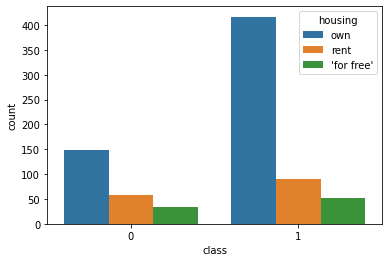

In [32]:
sns.countplot(x='class',data=train,hue='housing')

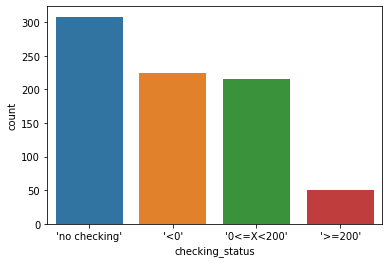

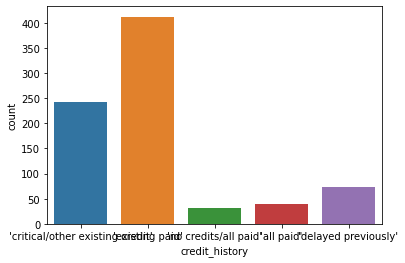

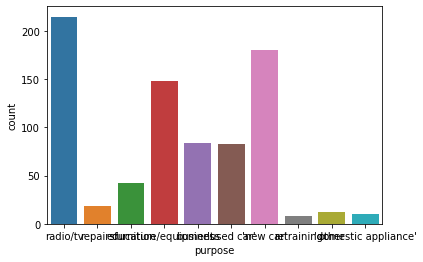

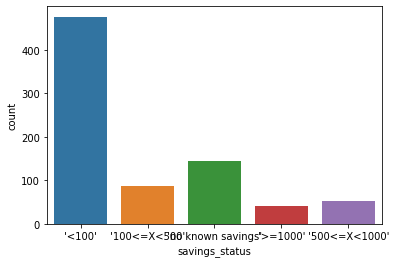

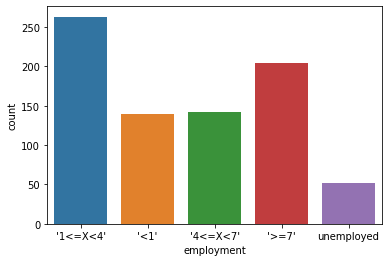

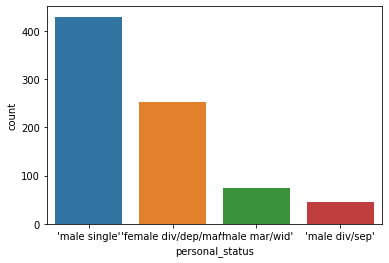

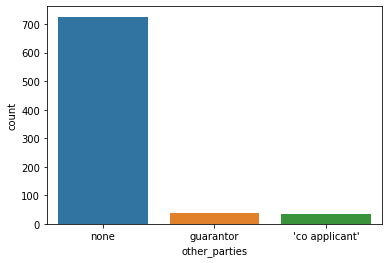

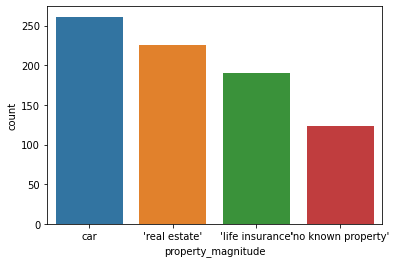

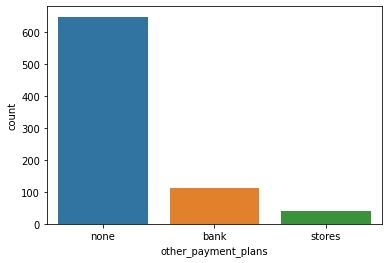

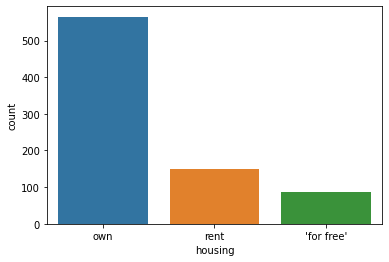

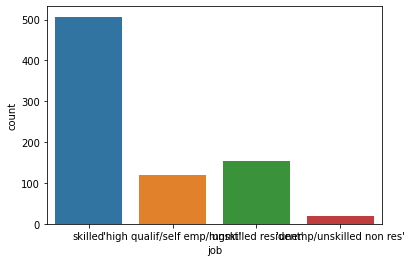

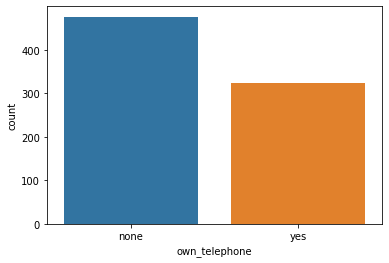

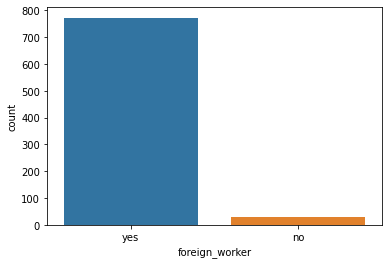

In [20]:
for cols in cat_cols:
  sns.countplot(x=cols,data=train)
  plt.show()

In [13]:
!pip install catboost

     |████████████████████████████████| 76.4 MB 45 kB/s 


In [14]:
from catboost import CatBoostClassifier
from sklearn.metrics import *
from sklearn.model_selection import *
#
from hyperopt import hp, fmin, tpe, Trials
from hyperopt.pyll.base import scope
from functools import partial
from sklearn.metrics import f1_score
#
from sklearn.model_selection import StratifiedKFold

In [15]:
def optimize(params, x, y):
  
  # initialize model with current parameters
  model = CatBoostClassifier(**params,eval_metric='AUC',
                             auto_class_weights='Balanced',verbose=0,
                             task_type='GPU')
  #model = RandomForestClassifier(**params)
  # initialize stratified k-fold
  kf = StratifiedKFold(n_splits=5)
  # initialize accuracy list
  accuracies = []
  # loop over all folds
  for idx in kf.split(X=x, y=y):
    train_idx, test_idx = idx[0], idx[1]
    xtrain,xtest = x.iloc[train_idx],x.iloc[test_idx]
    ytrain,ytest = y[train_idx],y[test_idx]
    # fit model for current fold
    model.fit(xtrain, ytrain,cat_features =cat_cols)
    #model.fit(xtrain, ytrain)
    #create predictions
    preds = model.predict(xtest)
    # calculate and append accuracy
    fold_accuracy = f1_score(ytest,preds)
    accuracies.append(fold_accuracy)
  # return negative accuracy
  return -1 * np.mean(accuracies)

## Parameter space for CatBoostClassifier

In [16]:
# define a parameter space
# now we use hyperopt
param_space = {
# quniform gives round(uniform(low, high) / q) * q
# we want int values for depth and estimators
"max_depth": scope.int(hp.choice("max_depth", [3,5,7,8])),
#CatBoostError: only one of the parameters iterations, n_estimators, num_boost_round, num_trees should be initialized.
#"n_estimators": scope.int(hp.quniform("n_estimators", 100, 1500, 1)),
# choice chooses from a list of values
"learning_rate": hp.loguniform('learning_rate', -5.0, -2),
# uniform chooses a value between two values
"random_state": scope.int(hp.quniform("random_state", 40, 100,10)),
"num_boost_round": scope.int(hp.choice("num_boost_round", [500,1000,1500,2000]))
}

## HyperParameter optimization using hyperopt

In [17]:
# partial function
optimization_function = partial(optimize,x=X,y=Y)
# initialize trials to keep logging information
trials = Trials()
# run hyperopt
hopt = fmin(fn=optimization_function,
             space=param_space,
            algo=tpe.suggest,
            max_evals=15,
            trials=trials
           )

100%|██████████| 15/15 [1:16:53<00:00, 307.56s/it, best loss: -0.8202121970976435]


In [18]:
print(f" parameters for CatBoostClassifier {hopt}")

 parameters for CatBoostClassifier {'learning_rate': 0.05850805952104139, 'max_depth': 1, 'num_boost_round': 2, 'random_state': 50.0}


Running 1 iteration
0.7613412228796843
0.7868217054263567
Running 2 iteration
0.7389558232931727
0.7729831144465291
Running 3 iteration
0.7692307692307693
0.7272727272727272
Running 4 iteration
0.7932960893854748
0.7733333333333333
Running 5 iteration
0.7692307692307692
0.7907869481765835
-----------KFOLD--------------
AxesSubplot(0.125,0.125;0.775x0.755)
0.655 0.7275 0.70025


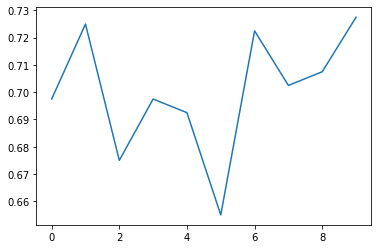

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
iterations = 5
scores = []
scores_val = []
target = Y
temp = X
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = StratifiedKFold(n_splits = 2, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
        ytrain,ytest = target[train_index],target[test_index]
        
        #model  = CatBoostClassifier(learning_rate = 0.04627007502666947, n_estimators =1483, random_state = 60)    
        model = CatBoostClassifier(max_depth=1,
                                   learning_rate = 0.05850805952104139,
                                   random_state=50,
                                   eval_metric='AUC',
                                   auto_class_weights='Balanced',
                                   num_boost_round=1500,verbose=0,  task_type='GPU')
        model.fit(xtrain,ytrain,cat_features=cat_cols)
            
        preds = model.predict(xtest)
        
        print(f1_score(ytest,preds))
        scores.append(accuracy_score(ytest,preds))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))

## Train_Test_Split

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.10,stratify=Y,random_state=42)

In [27]:
model = CatBoostClassifier(max_depth=1,
                                   learning_rate = 0.05850805952104139,
                                   random_state=50,
                                   eval_metric='AUC',
                                   auto_class_weights='Balanced',
                                   num_boost_round=1500,verbose=0,  task_type='GPU')
model.fit(X_train,y_train,cat_features=cat_cols)
            
preds = model.predict(X_test)

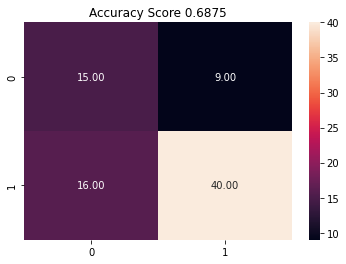

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score
cf = confusion_matrix(y_test,preds)
sns.heatmap(cf,annot=True,fmt=".2f")
plt.title(f"Accuracy Score {accuracy_score(y_test,preds)}")
plt.show()

## Make Predictions

In [23]:
predictions = model.predict(test)

In [24]:
test['prediction'] =predictions

In [25]:
test[['prediction']].to_csv('catboost1.csv',index=False)

## Submission Scores

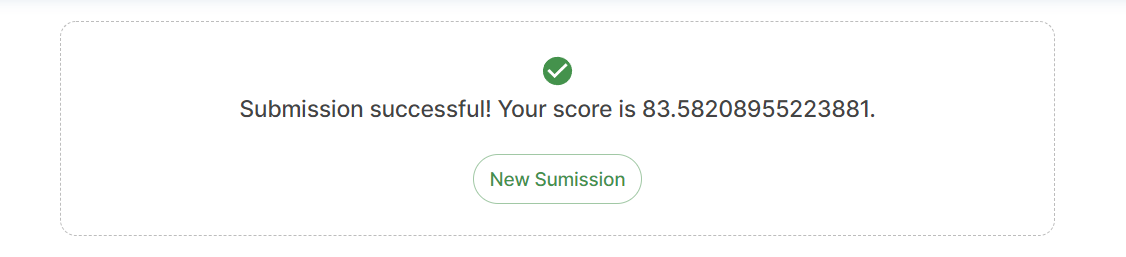

## Explainable AI

In [33]:
!pip install shap

     |████████████████████████████████| 356 kB 4.1 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491656 sha256=c71fdd9ecedc6de8345fc970c73d58db14658d34e3a6d8d37514bd5808d75c89
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [34]:
#ignoring all warnings
import warnings
warnings.filterwarnings('ignore')

import shap

# load JS visualization code to notebook. Without this, the SHAP plots won't be displayed
shap.initjs()

In [35]:
# creating an explainer for our model
explainer = shap.TreeExplainer(model)

# finding out the shap values using the explainer
shap_values = explainer.shap_values(X_test)

# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer.expected_value)

# displaying the first 5 rows of the shap values table
pd.DataFrame(shap_values).head()

Expected Value: 0.019972867552397962


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.528848,-0.237958,0.040704,0.372897,-0.038395,-0.191794,-0.028760,-0.198810,0.151053,-0.042143,-0.146182,-0.096759,-0.044536,0.07885,-0.333574,0.020240,0.147348,-0.002787,0.004449,-0.022024
1,-0.528848,0.400665,0.334798,0.372897,0.007929,-0.191794,-0.057694,-0.198810,0.151053,-0.042143,0.088264,-0.096759,0.129686,0.07885,-0.333574,-0.031533,0.147348,-0.002787,-0.003013,-0.022024
2,0.510641,0.657455,0.040704,-0.078334,-0.013464,0.133297,-0.057694,0.321912,-0.126603,-0.042143,0.088264,-0.096759,0.229441,0.07885,-0.333574,0.020240,-0.012801,0.016674,-0.003013,-0.022024
3,0.813712,0.657455,0.040704,-0.078334,0.540573,0.133297,-0.098001,0.321912,0.151053,0.769058,-0.146182,0.066140,-0.078456,0.07885,-0.333574,0.020240,-0.015733,0.016674,-0.003013,0.800210
4,0.813712,-0.237958,0.040704,0.277179,-0.013464,0.277876,0.125089,-0.198810,-0.126603,-0.042143,0.221316,0.066140,-0.058681,0.07885,0.139562,0.020240,-0.015733,-0.002787,-0.003013,-0.022024


## Force Plot of the 1st customer (row 0)

In [37]:
y_test.iloc[0],preds[0]

(1, 0)

In [38]:
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values[0,:], X_test.iloc[0,:])

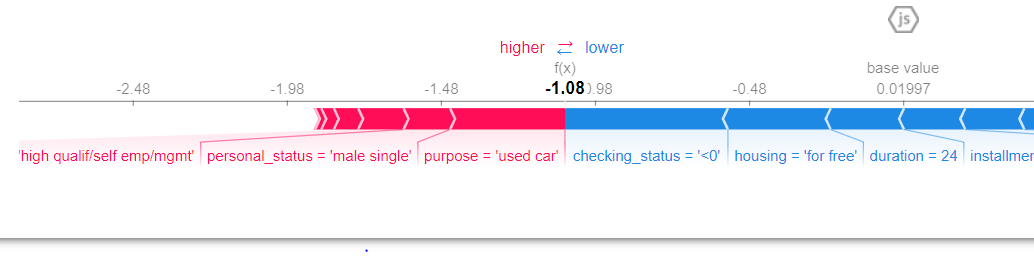

## Explaining the predictions for row 25

In [41]:
y_test.iloc[25],preds[25]

(1, 0)

In [42]:
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values[25,:], X_test.iloc[25,:])

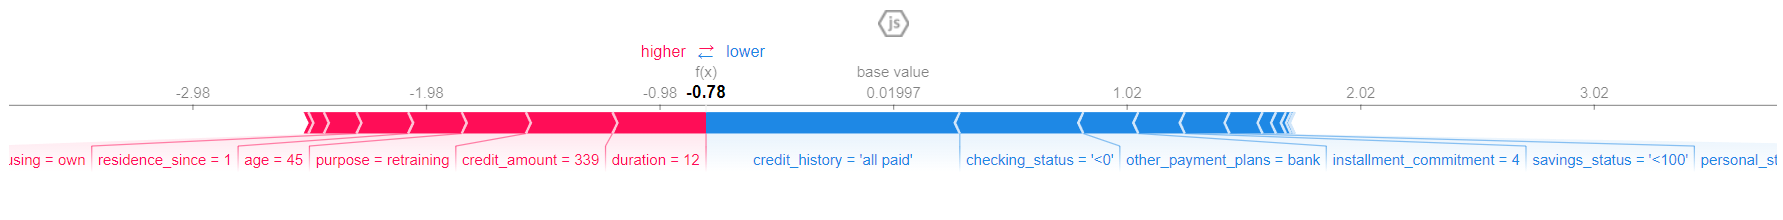

## Feature importance

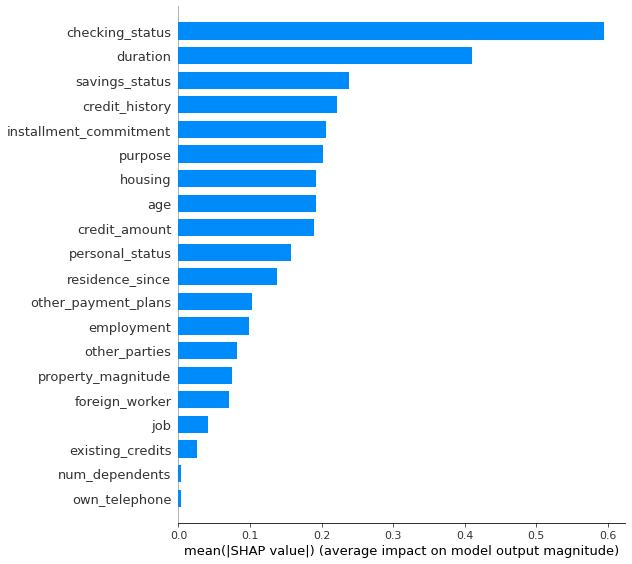

In [43]:
shap.initjs()
shap.summary_plot(shap_values,X_test, plot_type="bar")